<a href="https://colab.research.google.com/github/rida-manzoor/DL/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network(CNN)
CNN also known as covnet, are special kind of neural network for processing data that has a known grid like topology like time series data(1D) or images(2D)

1998 Yann Lecun

## **Why we can not use ANN**

1. When image size will increase, weights will also increase, training time will get larger along with computational cost.
2. Overfitting
3. Loss imp info like spatial arrangement of pixel

## CNN Intuition
1. Extract features(Edges)
2. Then in deep layers it combines these edges to make recognize complex features.


## CNN vs Visual Cortex

In summary we can say that there are two main types of cells in brain.
1. Simple cells
        Have smaller receptive field. Work on principal of preferred stimuli (can detect only one type of edge)
2. COmplex cells
        Have bigger receptive field. Detect higher features.


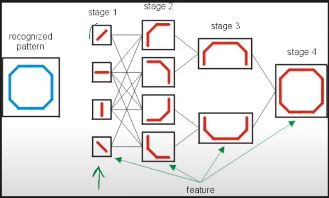

In 1979, by leveraging his knowledge of the visual cortex as a starting point, Dr. Fukushima invented a hierarchical neural network model, in which layers of S-cells, which extract visual features of the input pattern, are alternated with layers of C-cells that tolerate or absorb any deformations in the extracted features. He named it the **"neocognitron**". The neocognitron has the ability of self-organization and learns to recognize various patterns including those in text, geometric forms, and half-tone images.
[Read More](https://www.candc.or.jp/en/2021/group_a.html#:~:text=Fukushima%20invented%20a%20hierarchical%20neural,named%20it%20the%20%22neocognitron%22.)

## **Convolution Operation**

CNN has three types of layers:
1. Convolution layer
2. Pooling layer
3. Fully connected layer

We mostly work with two type of images
1. Greyscale
2. RGB

An image consists of pixels, with each pixel having a value ranging from 0 to 255 in grayscale images. In the case of RGB images, three channels act as separate layers, resembling sheets that together form the entire image. Each channel operates akin to a grayscale image, and their dimensions are typically represented as 128x128x3.
<br><br><br>

**Edge Detection**

"edge" refers to the boundaries or transitions between different regions in an image. It represents areas where the intensity or color changes significantly, indicating the presence of objects or features.


![sd](https://www.researchgate.net/profile/Ihab-S-Mohamed/publication/324165524/figure/fig3/AS:611103423860736@1522709818959/An-example-of-convolution-operation-in-2D-2.png)
[link](https://www.researchgate.net/figure/An-example-of-convolution-operation-in-2D-2_fig3_324165524)

At right side we have image and a filter(kernal). Filter can be 3x3 or 5x5 or whatever. Filters are used to detect edges in the image. We convolve filter over image. And matrix we get, is called feature map.

For more understanding, how convolution work, see this [Demo](https://deeplizard.com/resource/pavq7noze2)


If image is nxn and filter size is mxm, resultant feature map will be (n-m+1)x(n-m+1)

## **Padding**

Add column and rows of zero all around image.

Result feature map will be: n+2p-f+1

**WHy need padding?**
1. Loss of information in earlier layers
2. Avoiding Border Effects



In [ ]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense,Conv2D, Flatten
from keras import Sequential
from keras.datasets import mnist

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
model = Sequential()

# Here padding can be valid or same

model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               3211392   
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3231498 (12.33 MB)
Trainable params: 323

## Stride

In convolutional operations, the stride is the number of positions the convolutional kernel (filter) is shifted over the input data. A larger stride reduces the spatial dimensions of the output feature map, while a smaller stride preserves more spatial information.


For Demo how stride and padding actually work, see [Link](https://hannibunny.github.io/mlbook/neuralnetworks/convolutionDemos.html).

Feature map will be of size $$\frac{n+2p-f}{s}+1$$

Here s is stride, p is padding, n is image size, and f is filter size.

**Why need stride?**
1. Want only high level features
2. Computing power

In [ ]:
model = Sequential()

# Here padding can be valid or same

model.add(Conv2D(32,kernel_size=(3,3),padding='same',strides=(2,2),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=(3,3),padding='same',strides=(2,2), activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3),padding='same',strides=(2,2), activation='relu'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 14, 14, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 7, 32)          9248      
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 32)          9248      
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               65664     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 85770 (335.04 KB)
Trainable params: 8577

## **Pooling**

**Issues with Convolution layers**
1. Memory Issues
2. Translation variance

Suppose image size is 228x228x3 and we apply 100 3x3 filters on first convolution layer. SO resultant feature map will be 226x226x100. And if we are choose 32bit floating values to store these numbers. That's mean we have to store 226x226x100x32(19 MBs) in memory for one image. If we have 100 training images it will take around 1.5 GB space. That's why we need pooling layer to cut our computational cost.


Translation variance in CNNs refers to the network's ability to recognize and understand patterns or features in an input data along with their specific location within the input space. In other words, the network is not able to detect patterns if they are shifted or translated spatially. We need translation invariance. That's what pooling provide us.

**Why Pooling**

Pooling Solve above mentioned problems thats why we use pooling.

[Live Demo](https://deeplizard.com/resource/pavq7noze3)

## Pooling on volumn
If you have two feature maps it will apply pooling on both seperatedly.


##Advantages of Pooling
- Feature map size reduced
- Translation invariance
- Enhanced Featured(Only in MaxPooling)
- No need of training


## Types of Pooling
In Keras, there are following types of Pooling:
- MaxPooling
- Average Pooling
- GLobal Pooling(Used in end, Use this to reduce overfitting)
    - GLobal Max Pooling
    - Global Min Pooling


## Disadvantages Of Pooling
- Translation Invariance (In Image Segmentation Task)
- Loss of Information


# CNN vs ANN
If we are working on image dataset. Let's suppose image size is 28x28.

**ANN Network Will do this:**
- COnvert 2D image into 1D. That's mean we will have 784 inputs.
- Make Dense layers (Fully Connected)
- Last layer with softmax function.

**CNN Network will do this:**
- Apply a filter on 2D image.(Conv layer). Also add bais for each filter.
- Get feature map and apply ReLu on it.
- MaxPooling layer
- Fully connected layers



**Difference**
- In CNN learnable parameters are not dependant on input size. While in ANN it is dependent.

**Similarity**
- In

# Backpropagation in CNN

Suppose we are working with this network. We have one convolution layer with only one filter, one maxpooling layer, and a fully connected layer.

## Trainable Parameters
w_1 = (3,3)

b_1 = (1,1)

w_2 = (1,4)

b_2 = (1,1)

Total trainable parameters in system will be 15.

Now we want to reduce our loss same as in ML. That's mean our loss is dependent on these 4 parameters. We have to find optimal values for these parameters. So Logical diagram for above netwrok will be somewhere like this: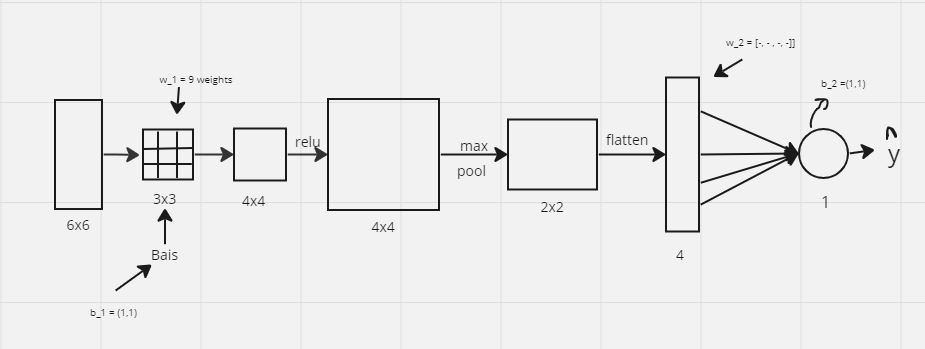



## Forward Propagation

$$ z_1 = conV(x,w_1)+b_1 $$
$$ A_1 = relu(z_1) $$
$$ P_1 = maxpool(A_1) $$
$$ F = flatten(P_1) $$
$$ z_2 = w_2.F + b_2 $$
$$ A_2 = σ(z_2)$$


A_2 is predicted output, it will give loss. We have to backpropagate (that's mean we have to find gradient descents) to minimize loss.

## Back Propagation

$$ w_1 = w_1 - η\frac{∂L}{∂w_1} $$<br>
$$ b_1 = b_1 - η\frac{∂L}{∂b_1} $$<br>
$$ w_2 = w_2 - η\frac{∂L}{∂w_2} $$<br>
$$ b_2 = b_2 - η\frac{∂L}{∂w_2} $$

Firstly we have to find optimum w_2. To find it's derivative we have to find:
$$\frac{∂L}{∂w_2} =\frac{∂L}{∂A_2} * \frac{∂A_2}{∂z_2} * \frac{∂z_2}{∂w_2} $$
<br>
$$\frac{∂L}{∂b_2} =\frac{∂L}{∂A_2} * \frac{∂A_2}{∂z_2} * \frac{∂z_2}{∂b_2} $$

We have to compute four derivatives in order to computer derivatives of w_2 and b_2.

$$\frac{∂L}{∂w_1} =\frac{∂L}{∂A_2} * \frac{∂A_2}{∂z_2} * \frac{∂z_2}{∂F} * \frac{∂F}{∂P_1} * \frac{∂P_1}{∂A_1} * \frac{∂A_1}{∂Fz_1} * \frac{∂z_1}{∂w_1}$$
<br>
$$\frac{∂L}{∂b_1} =\frac{∂L}{∂A_2} * \frac{∂A_2}{∂z_2} * \frac{∂z_2}{∂F} * \frac{∂F}{∂P_1} * \frac{∂P_1}{∂A_1} * \frac{∂A_1}{∂Fz_1} * \frac{∂z_1}{∂b_1}$$

